# Multivariate Linear Regression using 2021 MLB batting data

## Import Neccesary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Import dataset CSV file

In [3]:
df = pd.read_csv('2021MLBbattingStats.csv')
df.head()

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Whit Merrifield,KC,2B,33,162,664,97,184,42,3,...,4,40,103,0,12,4,0.277,0.317,0.395,0.712
1,Marcus Semien,TOR,2B,31,162,652,115,173,39,2,...,1,66,146,0,3,3,0.265,0.334,0.538,0.872
2,Tommy Edman,STL,2B,27,159,641,91,168,41,3,...,5,38,95,2,4,6,0.262,0.308,0.387,0.695
3,Bo Bichette,TOR,SS,24,159,640,121,191,30,1,...,1,40,137,0,4,6,0.298,0.343,0.484,0.827
4,Isiah Kiner-Falefa,TEX,SS,27,158,635,74,172,25,3,...,5,28,90,1,2,11,0.271,0.312,0.357,0.669


## Define x and y

In [4]:
x = df.drop(['AVG','Player','Team','Pos'], axis=1).values
y = df['AVG'].values

## Split dataset into training set and test set

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Train model on the training set

In [6]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Predict test set results

In [7]:
y_pred=model.predict(x_test)

## Evaluate model 

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8964735849408206

## Plot results

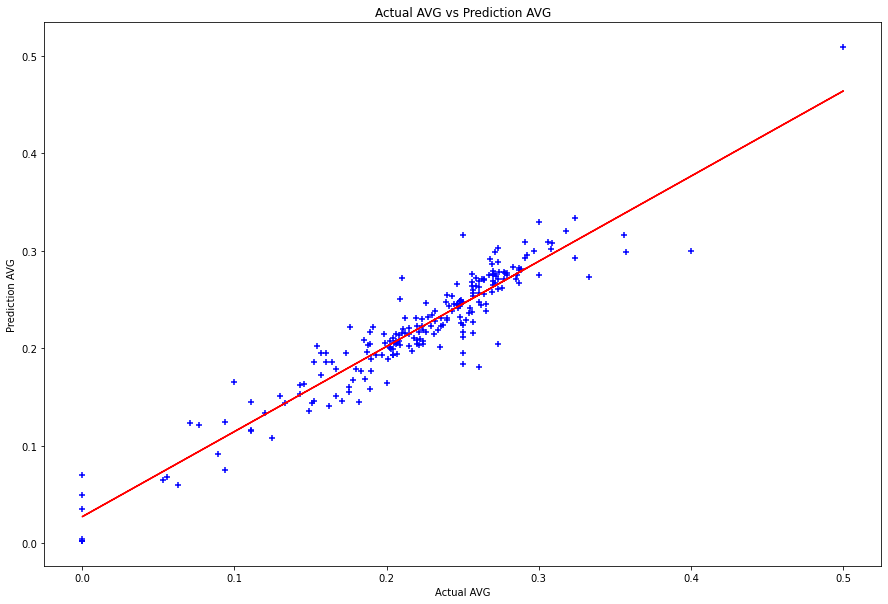

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred, color = "blue", marker = "+")
plt.xlabel('Actual AVG')
plt.ylabel('Prediction AVG')
plt.title('Actual AVG vs Prediction AVG')

z = np.polyfit (y_test,y_pred,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color = "red")


## Actual values vs Predicted values

In [34]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:25]

,Actual Value,Predicted Value,Difference
0,0.292,0.295383,-0.003383
1,0.208,0.206821,0.001179
2,0.291,0.292258,-0.001258
3,0.262,0.244572,0.017428
4,0.215,0.220776,-0.005776
5,0.220,0.222986,-0.002986
6,0.205,0.204932,0.000068
7,0.333,0.273514,0.059486
8,0.151,0.143722,0.007278
9,0.261,0.247357,0.013643
